In [1]:
import numpy as np
import scipy
import sklearn
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture,BayesianGaussianMixture

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['image.cmap'] = 'Greys'
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False



import sys,os,pdb,copy,pickle
from importlib import reload
# import pynapple as nap

sys.path.append('/mnt/home/szheng/projects/seq_detection2/code')
sys.path.append('/mnt/home/szheng/projects/util_code')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis/scripts')
sys.path.append('/mnt/home/szheng/projects/cluster_spikes')
sys.path.append('/mnt/home/szheng/projects/place_variability/code')
import data_prep_new as dpn
import place_cell_analysis as pa
import plot_helper as ph
import preprocess as prep
import nmf_analysis as na
import nmf_plot as nmfp
reload(na)

import raster_new as rn
import data_prep_pyn as dpp


import change_point_analysis as cpa
import change_point_plot as cpp

import place_field_analysis as pf

import switch_analysis_one_session as saos
reload(saos)

import process_central_arm as pca 
import change_point_analysis_central_arm_seperate as cpacas

import misc
reload(misc)
from misc import get_nth_key, get_nth_val

67 sessions!
67 sessions!


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
import database
db = database.db

subdb = db.query('owner=="roman"').sort_values('n_pyr_putative',ascending=False)
subdb = subdb.query('ntrials>=20&n_neurons>=50')
to_exclude_sess = ['e16_3m2_211211']
subdb=subdb.loc[~subdb['sess_name'].isin(to_exclude_sess)]


import pf_recombine_central as pfrc
import fr_map_one_session as fmos
import switch_detection_one_session as sdos
import get_all_switch_add_metrics as gasam

import preprocess_one_session as prepos

# redo novel linear maze: 
### relabel pf_param, relabel X_pwc, X_raw, changes_df, 
### redo all sw

In [9]:
ma=['linearMaze' in x for x in subdb['behavior']]
data_dir_full = subdb.loc[ma]['data_dir_full'][0]

In [38]:
ind_map

index
0      0
1      2
2      4
3      6
4      8
5     10
6     12
7     14
8     16
9     18
10    20
11    22
12    24
13    26
14    28
15    30
16    32
17    34
18    36
19    38
20    40
21    42
22    44
23    46
24    48
Name: trial_ind, dtype: int64

<Axes: >

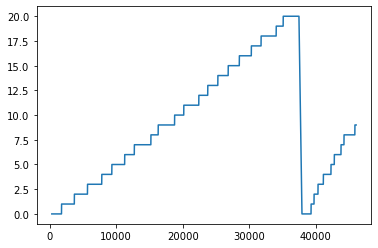

In [55]:
spk_beh_df['trial'].plot()

In [39]:
pf_one_ti_tt

0         1         2          3          4   \
fr_mean 1 0.0 39  0  5.664933  2.438624  3.287971   6.095787   4.741862   
                  1  1.521441  3.764691  2.079419   2.433982   1.178651   
              40  0  5.591291  4.488800  3.276075   4.689647   8.897117   
              42  0  9.650360  6.885995  9.871484  13.196498  10.124957   
              46  0  1.957084  6.408816  7.300044   6.354225   6.546265   
...                       ...       ...       ...        ...        ...   
std     1 0.0 351 0       NaN       NaN  1.616739   1.654642   1.546079   
              352 0       NaN       NaN  2.716967   2.669624   3.192550   
              353 0       NaN       NaN       NaN   2.357789   2.431777   
              354 0  2.754955  2.939070  3.070485   3.094520   3.042570   
              358 1  1.078982  1.101763       NaN   0.739597   1.065043   

                           5          6          7          8          9   \
fr_mean 1 0.0 39  0  5.181719   7.902418   8.806279   5.890770   2.317861   
                  1  2.884574   4.882437   6.236745   4.878197   5.499744   
              40  0  7.791523   7.031345   7.221537   8.665652   7.680685   
              42  0  9.669831  12.242982  11.863352  11.267012  13.057272   
              46  0  9.543949   6.391152   3.433948   5.293646   2.773185   
...                       ...        ...        ...        ...        ...   
std     1 0.0 351 0  1.500077   1.032682   1.534159   1.641331        NaN   
              352 0  2.874137   2.825213   3.198994   3.326789   3.586824   
              353 0  2.047728   2.319043        NaN   1.936169        NaN   
              354 0  3.204058   3.088545   3.442429   3.207740   3.281019   
              358 1  1.085130   1.081028   1.063314   1.088589   1.046984   

                     ...        23         24         25        26         27  \
fr_mean 1 0.0 39  0  ...  4.942148   5.037257   7.159238  5.762541   9.131222   
                  1  ...  5.266101   5.858879   5.690009  8.040732   6.743307   
              40  0  ...  9.092820  10.618698  12.678677  8.905606  11.446643   
              42  0  ...  8.010325   7.729456   7.616879  7.890557   6.398544   
              46  0  ...  5.290830   6.227633   7.313746  4.142802   6.519637   
...                  ...       ...        ...        ...       ...        ...   
std     1 0.0 351 0  ...  0.000000   1.618632        NaN       NaN        NaN   
              352 0  ...  2.778820   3.114924   3.189072  3.094808   3.473431   
              353 0  ...  1.926134        NaN   2.054239       NaN        NaN   
              354 0  ...  3.744103   3.063230   3.327188  3.643440   3.320064   
              358 1  ...  1.119183   0.894966   1.108739       NaN        NaN   

                           28        29         30         31         32  
fr_mean 1 0.0 39  0  4.016579  4.187309  10.107284   4.941137   3.900203  
                  1  7.537133  3.733876   4.585023   5.086982   6.051317  
              40  0  9.092112  8.835520   6.753264  10.549565  10.543004  
              42  0  7.963991  8.073056   9.478397   9.001368  11.143076  
              46  0  6.800862  5.301054   3.204703   2.834733   2.088808  
...                       ...       ...        ...        ...        ...  
std     1 0.0 351 0  1.556480       NaN        NaN   1.580904        NaN  
              352 0  2.721480  3.256576   3.058187   3.038185   3.179553  
              353 0  2.262272       NaN   1.994530        NaN        NaN  
              354 0  3.535155  3.267435   3.697043   3.469721   2.901758  
              358 1       NaN       NaN   1.124276        NaN        NaN  

[925 rows x 33 columns]

In [46]:
pf_params_recombined.loc['fr_mean',1].dropna(axis=1,how='all')

/tmp/ipykernel_610719/2499985213.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  pf_params_recombined.loc['fr_mean',1].dropna(axis=1,how='all')


0          1         2         3         4          5   \
0.0 42  0  14.854896   5.543880  5.430077  8.215379  4.782396   3.304102   
        1   5.590287  10.828172  9.615098  9.872458  5.860364   6.063954   
    47  0   0.912769   1.078350  2.208477  5.529037  4.750571  12.316476   
    48  0   3.390695   3.784980  7.688022  9.838058  8.108422  11.247475   
    51  1   0.779715   2.820855  2.507597  2.714407  0.583533   3.688300   
...              ...        ...       ...       ...       ...        ...   
1.0 284 0   1.276088   1.408648  4.638196  3.184825  5.269538   4.227347   
    287 0   3.016917   1.963654  2.507739  3.184274  3.700270   3.554435   
    288 0   0.000547   1.521432  0.479726  0.228948  0.000000   0.000000   
    298 0   0.000000   0.000000  0.000000  0.000000  0.000000   0.000000   
    302 0   1.316172   2.315603  6.629604  3.515119  4.178628   6.777455   

                  6          7          8          9   ...        15  \
0.0 42  0   4.145675  12.817205   6.034388   5.959819  ...  8.846018   
        1  11.281689   9.636367  11.499359  12.523366  ...  4.823253   
    47  0   7.483195   9.724968   9.224877  16.355858  ...  4.313714   
    48  0   7.970642   8.023845   8.230930   4.621681  ...  7.156278   
    51  1   5.203404   3.603236   3.613735   3.679694  ...  6.430694   
...              ...        ...        ...        ...  ...       ...   
1.0 284 0   4.457626   4.002638   1.442176   1.829920  ...  0.000000   
    287 0   6.556520   5.111053   5.173180   1.992255  ...  2.870634   
    288 0   0.000000   0.000000   0.000000   2.611157  ...  0.000000   
    298 0   0.000000   0.000000   0.000000   0.000000  ...  9.133733   
    302 0   6.992887   3.296400   4.488518   3.810458  ...  3.333774   

                  16         17         18         19         20         21  \
0.0 42  0   5.073690   4.055330  11.222521  10.804157  10.820275   3.785546   
        1   8.964706  14.678696  20.747917  18.475921   9.503314  12.630276   
    47  0   8.941310   7.020176  10.781368  15.265436   9.493812  10.541935   
    48  0   9.498056  11.499694   8.623053   8.316205   8.847891   7.654032   
    51  1   5.306229   5.384295   6.677427   7.615802   3.303277   3.608525   
...              ...        ...        ...        ...        ...        ...   
1.0 284 0   0.000000   0.000000   0.979764   0.443670   0.335398   0.000000   
    287 0   1.995208   2.623402   2.336802   0.665677   2.349056   2.446327   
    288 0   0.000000   1.702364   0.000000   0.000000   0.000000   3.371802   
    298 0  10.940099   9.818650  19.891187  12.856603  10.066337  12.652763   
    302 0   0.625925   2.629100   4.550567   1.228462   0.000000   0.423159   

                  22        23         24  
0.0 42  0   6.481835  6.375989   6.581541  
        1  20.117031  9.943547  23.226752  
    47  0  11.791019  7.762380  16.335989  
    48  0  13.980586  8.772420   9.210257  
    51  1   4.581800  3.430582   5.061274  
...              ...       ...        ...  
1.0 284 0   0.405785  0.641535        NaN  
    287 0   3.825043  2.855314        NaN  
    288 0   0.000000  0.738683        NaN  
    298 0   8.643863  8.521977        NaN  
    302 0   0.623582  1.644265        NaN  

[225 rows x 25 columns]

In [ ]:
fn = 'prepped_data_agg.p'
fn_full = os.path.join(data_dir,fn)
prepped_data_agg = pickle.load(open(fn_full,'rb'))

all_fields_recombined_all = prepped_data_agg['all_fields_recombined_all']
pf_params_recombined_all=  prepped_data_agg['pf_params_recombined_all']


In [59]:
data_dir_full = subdb.iloc[0]['data_dir_full']
review_one=pfrc.main(data_dir_full,force_reload=False,load_only=True)

/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_data/place_field_afterheadscan_recombine.p exists; loading---


In [61]:
review_one.keys()

dict_keys(['all_fields_recombined', 'params_recombined', 'all_fields', 'params'])

In [97]:
reload(pfrc)
reload(pca)

<module 'process_central_arm' from '/mnt/home/szheng/projects/util_code/process_central_arm.py'>

In [98]:
%%time
for i,row in subdb.loc[ma].iterrows():
    data_dir_full = row['data_dir_full']
    pf_res_recombine = pfrc.main(data_dir_full,force_reload=True,load_only=False,dosave=True)

/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220118/py_data/place_field_afterheadscan.p exists; loading---


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) 

saved at /mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220118/py_data/place_field_afterheadscan_recombine.p
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220120/py_data/place_field_afterheadscan.p exists; loading---


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: invalid value encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) /

saved at /mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220120/py_data/place_field_afterheadscan_recombine.p
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_211116/py_data/place_field_afterheadscan.p exists; loading---


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


saved at /mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_211116/py_data/place_field_afterheadscan_recombine.p
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m2/e16_3m2_211212/py_data/place_field_afterheadscan.p exists; loading---


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: invalid value encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: invalid value encountered in true_divide
  slope = (y_hi - y_lo) / 

saved at /mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m2/e16_3m2_211212/py_data/place_field_afterheadscan_recombine.p
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_211119/py_data/place_field_afterheadscan.p exists; loading---


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


saved at /mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_211119/py_data/place_field_afterheadscan_recombine.p
CPU times: user 7.77 s, sys: 2.48 s, total: 10.3 s
Wall time: 10.4 s


In [94]:
data_dir_full = subdb.loc[ma].iloc[0]['data_dir_full']
pf_res_recombine = pfrc.main(data_dir_full,force_reload=True,load_only=False,dosave=True)

/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220118/py_data/place_field_afterheadscan.p exists; loading---


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) 

saved at /mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220118/py_data/place_field_afterheadscan_recombine.p


In [127]:
for i,row in subdb.loc[ma].iterrows():
    data_dir_full = row['data_dir_full']

    sw_res = sdos.main(data_dir_full,force_reload=False,load_only=True)
    sw_res_redo = copy.deepcopy(sw_res)
    # pval = sw_res['pval']
    # pval_all[ani,sess]=pval
    # best_n = sw_res['best_n']
    # best_n_all[ani,sess] = best_n
    X_pwc = sw_res['X_pwc']
    # X_pwc_all[ani,sess] = X_pwc
    X_raw = sw_res['X_raw']
    # X_raw_all[ani,sess]=X_raw
    changes_df = sw_res['changes_df']
    # changes_df_all[ani,sess] = changes_df

    res=dpp.load_spk_beh_df(data_dir_full,load_only=True)
    if res is not None:
        spk_beh_df = res['spk_beh_df']
        spk_beh_df,_ = dpp.add_lin_binned(spk_beh_df,bin_size=2.2,nbins=None)
        trial_index_to_index_within_df = dpp.trial_index_to_index_within_trialtype(spk_beh_df)
        index_within_to_trial_index_df = dpp.index_within_to_trial_index(spk_beh_df)


    k_l = ['X_pwc','X_raw','changes_df']
    for k in k_l:
        df = sw_res[k]
        df_redo = {}
        for ti in [0,1]:
            df_oneti = df.loc[ti]
            if ti==1:
                df_oneti_redo = {}
                for tt in [0,1]:
                    df_one_ti_tt = df_oneti.loc[tt]
                    indmap = index_within_to_trial_index_df.loc[ti,tt]
                    col_intersect=df_one_ti_tt.columns.intersection(indmap.index)
                    df_one_ti_tt = df_one_ti_tt.loc[:,col_intersect]
                    df_one_ti_tt.columns = indmap.loc[df_one_ti_tt.columns]
                    df_oneti_redo[tt] = df_one_ti_tt
                df_oneti_redo = pd.concat(df_oneti_redo,axis=0).sort_index(axis=1)
                df_oneti = df_oneti_redo

            df_redo[ti] = df_oneti
        df_redo = pd.concat(df_redo,axis=0)
        sw_res_redo[k] = df_redo



    fn=os.path.join(data_dir_full,'py_data/sw_res_afterheadscan.p')
    pickle.dump(sw_res_redo,open(fn,'wb'))


/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220118/py_data/sw_res_afterheadscan.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220120/py_data/sw_res_afterheadscan.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_211116/py_data/sw_res_afterheadscan.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m2/e16_3m2_211212/py_data/sw_res_afterheadscan.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_211119/py_data/sw_res_afterheadscan.p exists; loading---


In [128]:
for i,row in subdb.loc[ma].iterrows():
    data_dir_full = row['data_dir_full']
    sw_info_res=gasam.main(data_dir_full,force_reload=True,load_only=False,dosave=True)

/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220118/py_data/place_field_afterheadscan_recombine.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220118/py_data/sw_res_afterheadscan.p exists; loading---
saved at /mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220118/py_data/switch_analysis/all_sw_info.p
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220120/py_data/place_field_afterheadscan_recombine.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220120/py_data/sw_res_afterheadscan.p exists; loading---
saved at /mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220120/py_data/switch_analysis/all_sw_info.p
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_211116/py_data/place_field_afterheadscan_recombine.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_211116/py_data/sw_res_afterheadscan.p exists; loading---
saved at /mnt/home/szheng/ceph/ad/roman_d

In [132]:
ddf=subdb.loc[ma].iloc[0]['data_dir_full']
sw_info_res=gasam.main(ddf,force_reload=False,load_only=True,dosave=False)

/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220118/py_data/switch_analysis/all_sw_info.p exists; loading---


In [133]:
sw_info_res['all_sw_d'].loc[1]

,trialtype,uid,field_index,time,speed_gauss,field_pos,trial_index,switch,index_within,switch_trial,switch_trial_frac,pre_ntrials_in_segment,post_ntrials_in_segment
0,1.0,138,0,13221.306364,34.061202,30.072466,4,1.0,2,2.0,0.057143,2,4
1,1.0,142,0,13222.174391,27.916257,42.089589,4,1.0,2,2.0,0.057143,2,2
2,1.0,327,0,13221.150210,34.985462,27.730791,4,1.0,2,2.0,0.057143,2,2
3,0.0,50,0,13240.032684,17.446170,7.490889,5,-1.0,2,2.0,0.060606,2,31
4,0.0,75,0,13233.872035,7.336006,28.437163,5,1.0,2,2.0,0.060606,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,1.0,138,0,15028.506168,16.969049,29.580504,66,-1.0,33,33.0,0.942857,27,2
268,1.0,253,0,15025.376755,7.765827,21.693192,66,-1.0,33,33.0,0.942857,2,2
269,1.0,293,0,15028.835750,33.800621,32.760496,66,-1.0,33,33.0,0.942857,33,2
270,1.0,349,0,15023.591525,24.839640,3.427267,66,-1.0,33,33.0,0.942857,6,2


In [22]:
res=dpp.load_spk_beh_df(data_dir_full,load_only=True)
if res is not None:
    spk_beh_df = res['spk_beh_df']
    spk_beh_df,_ = dpp.add_lin_binned(spk_beh_df,bin_size=2.2,nbins=None)
    trial_index_to_index_within_df = dpp.trial_index_to_index_within_trialtype(spk_beh_df)
    index_within_to_trial_index_df = dpp.index_within_to_trial_index(spk_beh_df)

pf_res_recombine = pfrc.main(data_dir_full,force_reload=False,load_only=True)

all_fields_recombined=pf_res_recombine['all_fields_recombined']
pf_params_recombined = pf_res_recombine['params_recombined']
params_recombined_redo = []
for ti in [0,1]:
    pf_one_ti=params_recombined.loc[(slice(None),ti),:]
    if ti==1:
        pf_one_ti_redo = []
        for tt in [0,1]:
            ind_map = index_within_to_trial_index_df.loc[ti,tt]
            pf_one_ti_tt=pf_one_ti.loc[(slice(None),ti,tt),:].dropna(axis=1,how='all')
            pf_one_ti_tt.columns = ind_map.loc[pf_one_ti_tt.columns]
            pf_one_ti_redo.append(pf_one_ti_tt)
        pf_one_ti_redo = pd.concat(pf_one_ti_redo,axis=0)
    else:
        pf_one_ti_redo = pf_one_ti
    params_recombined_redo.append(pf_one_ti_redo)
params_recombined_redo = pd.concat(params_recombined_redo,axis=0)

fn=os.path.join(data_dir_full,'py_data/place_field_afterheadscan_recombine.p')
pickle.dump(params_recombined_redo,open(fn,'wb'))



# sw_res = sdos.main(data_dir_full,force_reload=False,load_only=True)
# pval = sw_res['pval']
# pval_all[ani,sess]=pval
# best_n = sw_res['best_n']
# best_n_all[ani,sess] = best_n
# X_pwc = sw_res['X_pwc']
# X_pwc_all[ani,sess] = X_pwc
# X_raw = sw_res['X_raw']
# X_raw_all[ani,sess]=X_raw
# changes_df = sw_res['changes_df']
# changes_df_all[ani,sess] = changes_df
# var_res = sw_res['var_res']
# var_res_all[ani,sess]=var_res
# corr = sw_res['corr']
# corr_all[ani,sess] = corr

# sw_info_res=gasam.main(data_dir_full,force_reload=False,load_only=True)
# if sw_info_res is None:
#     sw_info_res=gasam.main(data_dir_full,force_reload=True,load_only=False)
# all_sw_d = sw_info_res['all_sw_d']
# all_sw_d_all[ani,sess] = all_sw_d
# all_sw_with_metrics_d = sw_info_res['all_sw_with_metrics_d']
# all_sw_with_metrics_d_all[ani,sess] = all_sw_with_metrics_d

/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220118/py_data/place_field_afterheadscan_recombine.p exists; loading---


In [26]:
params_recombined = pf_res_recombine['params_recombined']
params_recombined_redo = []
for ti in [0,1]:
    pf_one_ti=params_recombined.loc[(slice(None),ti),:]
    if ti==1:
        pf_one_ti_redo = []
        for tt in [0,1]:
            ind_map = index_within_to_trial_index_df.loc[ti,tt]
            pf_one_ti_tt=pf_one_ti.loc[(slice(None),ti,tt),:].dropna(axis=1,how='all')
            pf_one_ti_tt.columns = ind_map.loc[pf_one_ti_tt.columns]
            pf_one_ti_redo.append(pf_one_ti_tt)
        pf_one_ti_redo = pd.concat(pf_one_ti_redo,axis=0)
    else:
        pf_one_ti_redo = pf_one_ti
    params_recombined_redo.append(pf_one_ti_redo)
params_recombined_redo = pd.concat(params_recombined_redo,axis=0)
        


In [31]:
params_recombined_redo.loc[(slice(None),0),:] 

0          1         2          3          4   \
com 0 0.0  39  0       NaN   8.652008       NaN   6.024048   8.291150   
               1       NaN  40.178311       NaN  41.690748  40.801520   
               2       NaN  62.466901       NaN  63.271534  61.822070   
               3       NaN  88.749905       NaN  86.208484  84.300831   
           40  2       NaN  36.177849       NaN  35.984930  36.286837   
...                    ...        ...       ...        ...        ...   
std 0 both 342 0  0.856120   3.511168  2.607910   3.996665   3.714601   
           347 0  4.866549   3.982287  2.586199   3.015585   1.924105   
           348 0       NaN   3.389875  3.290599   4.317307   3.436889   
           353 0  0.363388   2.937581  2.429357   2.830880   2.647715   
           356 0       NaN   3.057476  2.499350   3.031415   2.498727   

                        5          6          7         8          9   ...  \
com 0 0.0  39  0       NaN   6.795896   7.069829       NaN        NaN  ...   
               1       NaN  40.209358  42.178240       NaN  39.936976  ...   
               2       NaN  62.319613  62.259725       NaN  62.465877  ...   
               3       NaN  88.251555  88.504962       NaN  90.072757  ...   
           40  2       NaN  35.446177  36.209573       NaN  36.361248  ...   
...                    ...        ...        ...       ...        ...  ...   
std 0 both 342 0  2.303577   4.333723   3.590599  2.399151   3.426366  ...   
           347 0  4.485245   2.159047   3.058146  4.051231   3.076280  ...   
           348 0  3.974255   4.402611   3.657662  3.305062   4.009022  ...   
           353 0  2.317439   2.834121   2.701234  2.289810   2.124311  ...   
           356 0  2.842785   2.875341   2.809913  2.763239   2.829946  ...   

                  50  52  54  56  58  60  62  64  66  67  
com 0 0.0  39  0 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
               1 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
               2 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
               3 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
           40  2 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
...               ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  
std 0 both 342 0 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
           347 0 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
           348 0 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
           353 0 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
           356 0 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  

[3515 rows x 68 columns]

In [30]:
params_recombined.loc[(slice(None),0),:] ==\
params_recombined_redo.loc[(slice(None),0),:] 

ValueError: Can only compare identically-labeled DataFrame objects

In [27]:
params_recombined_redo

0          1         2          3          4   5   \
com 0 0.0 39  0       NaN   8.652008       NaN   6.024048   8.291150 NaN   
              1       NaN  40.178311       NaN  41.690748  40.801520 NaN   
              2       NaN  62.466901       NaN  63.271534  61.822070 NaN   
              3       NaN  88.749905       NaN  86.208484  84.300831 NaN   
          40  2       NaN  36.177849       NaN  35.984930  36.286837 NaN   
...                   ...        ...       ...        ...        ...  ..   
std 1 1.0 352 0  1.810986        NaN  2.364606        NaN        NaN NaN   
          353 0       NaN        NaN  2.820350        NaN        NaN NaN   
          354 0  3.665242        NaN  3.492658        NaN   2.648284 NaN   
          356 0  0.901458        NaN       NaN        NaN        NaN NaN   
          358 0  2.359537        NaN  0.536514        NaN        NaN NaN   

                        6          7         8          9   ...        50  \
com 0 0.0 39  0   6.795896   7.069829       NaN        NaN  ...       NaN   
              1  40.209358  42.178240       NaN  39.936976  ...       NaN   
              2  62.319613  62.259725       NaN  62.465877  ...       NaN   
              3  88.251555  88.504962       NaN  90.072757  ...       NaN   
          40  2  35.446177  36.209573       NaN  36.361248  ...       NaN   
...                    ...        ...       ...        ...  ...       ...   
std 1 1.0 352 0   3.279855        NaN  3.088975        NaN  ...  3.423064   
          353 0   2.568905        NaN  4.223456        NaN  ...       NaN   
          354 0   2.897430        NaN  3.108907        NaN  ...  2.335431   
          356 0        NaN        NaN       NaN        NaN  ...  1.659027   
          358 0   3.515773        NaN  3.038716        NaN  ...  4.117062   

                       52        54        56        58        60        62  \
com 0 0.0 39  0       NaN       NaN       NaN       NaN       NaN       NaN   
              1       NaN       NaN       NaN       NaN       NaN       NaN   
              2       NaN       NaN       NaN       NaN       NaN       NaN   
              3       NaN       NaN       NaN       NaN       NaN       NaN   
          40  2       NaN       NaN       NaN       NaN       NaN       NaN   
...                   ...       ...       ...       ...       ...       ...   
std 1 1.0 352 0  3.973498  3.684667  3.520917  4.099875  3.045604  3.904764   
          353 0  2.119428  2.515289       NaN       NaN  2.647486  2.624533   
          354 0  2.399138  2.562006  2.888977  2.825730  2.569500  2.699165   
          356 0       NaN  2.214402  1.983430  1.901729  1.943415  1.913042   
          358 0       NaN  5.598400  3.357726  2.907642  2.901091  4.422007   

                       64        66        67  
com 0 0.0 39  0       NaN       NaN       NaN  
              1       NaN       NaN       NaN  
              2       NaN       NaN       NaN  
              3       NaN       NaN       NaN  
          40  2       NaN       NaN       NaN  
...                   ...       ...       ...  
std 1 1.0 352 0  3.635089  3.562911  3.900640  
          353 0       NaN  1.593754  2.794164  
          354 0  2.600107  3.048454       NaN  
          356 0  2.056017  1.967785  2.000312  
          358 0  2.725641  3.948019       NaN  

[5425 rows x 68 columns]

# redo one session after switch detection, reincoporate into aggregate

In [10]:
ddf = '/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220119/'
all_sw_res=gasam.main(ddf,dosave=True,force_reload=True)

/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220119/py_data/place_field_afterheadscan_recombine.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220119/py_data/sw_res_afterheadscan.p exists; loading---


/mnt/home/szheng/projects/nmf_analysis/switch_metrics.py:119: RuntimeWarning: invalid value encountered in long_scalars
  N = N / segment_len
/mnt/home/szheng/projects/nmf_analysis/switch_metrics.py:119: RuntimeWarning: invalid value encountered in long_scalars
  N = N / segment_len
/mnt/home/szheng/projects/nmf_analysis/switch_metrics.py:119: RuntimeWarning: invalid value encountered in long_scalars
  N = N / segment_len
/mnt/home/szheng/projects/nmf_analysis/switch_metrics.py:119: RuntimeWarning: invalid value encountered in long_scalars
  N = N / segment_len
/mnt/home/szheng/projects/nmf_analysis/switch_metrics.py:119: RuntimeWarning: invalid value encountered in long_scalars
  N = N / segment_len


saved at /mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220119/py_data/switch_analysis/all_sw_info.p


In [11]:
import test_co_switch_one_sess as tcsos

In [12]:
tcsos.main(ddf,dosave=True,force_reload=True)

/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220119/py_data/sw_res_afterheadscan.p exists; loading---
saved at /mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220119/py_data/co_sw_res_afterheadscan_fr_peak.p


{'co_sw_pval':    onoff  n_trial_lag  n_in_tuple
 0   1     0            2             0.000
                        3             0.000
                        4             0.000
           1            2             0.000
                        3             0.000
                        4             0.000
           2            2             0.001
                        3             0.000
                        4             0.000
    -1     0            2             0.214
                        3             0.047
                        4             0.023
           1            2             0.427
                        3             0.335
                        4             0.257
           2            2             0.161
                        3             0.170
                        4             0.159
 1   1     0            2             0.000
                        3             0.000
                        4             0.000
           1            2  

In [3]:
data_dir = '/mnt/home/szheng/ceph/place_variability/data/paper'
misc.get_or_create_subdir(data_dir)

'/mnt/home/szheng/ceph/place_variability/data/paper'

In [4]:
%%time
all_fields_recombined_all = {}
pf_params_recombined_all = {}
all_fields_all = {}
pf_params_all = {}
fr_map_trial_df_all = {}
fr_map_all = {}
occu_map_all = {}
pval_all = {}
best_n_all = {}
X_pwc_all = {}
X_raw_all = {}
changes_df_all = {}
var_res_all = {}
corr_all = {}
all_sw_d_all = {}
all_sw_with_metrics_d_all = {}
trial_index_to_index_within_df_all = {}

fr_map_trial_df_pyr_combined_all = {}

spk_beh_df_all = {}
cell_cols_d_all = {}

for ind,row in subdb.iterrows():
    data_dir_full = row['data_dir_full']
    ani = ind[0]
    sess = row['sess_name']
    
    res=dpp.load_spk_beh_df(data_dir_full,load_only=True)
    if res is not None:
        spk_beh_df = res['spk_beh_df']
        spk_beh_df,_ = dpp.add_lin_binned(spk_beh_df,bin_size=2.2,nbins=None)
        spk_beh_df_all[ani,sess] = spk_beh_df
        trial_index_to_index_within_df = dpp.trial_index_to_index_within_trialtype(spk_beh_df)
        trial_index_to_index_within_df_all[ani,sess] = trial_index_to_index_within_df
        cell_cols_d=res['cell_cols_d']
        cell_cols_d_all[ani,sess]=cell_cols_d
        

    pf_res_recombine = pfrc.main(data_dir_full,force_reload=False,load_only=True)

    all_fields_recombined=pf_res_recombine['all_fields_recombined']
    all_fields_recombined_all[ani,sess] = all_fields_recombined
    pf_params_recombined = pf_res_recombine['params_recombined']
    pf_params_recombined_all[ani,sess] = pf_params_recombined

    fr_map_res = fmos.main(data_dir_full,force_reload=False,load_only=True)
    fr_map_trial_df = fr_map_res['fr_map_trial_df']
    fr_map_trial_df_all[ani,sess] = fr_map_trial_df
    fr_map = fr_map_res['fr_map']
    fr_map_all[ani,sess] = fr_map
    occu_map = fr_map_res['occu_map']
    occu_map_all[ani,sess] = occu_map
    fr_map_trial_df_pyr_combined = fr_map_res['fr_map_trial_df_pyr_combined']
    fr_map_trial_df_pyr_combined_all[ani,sess] = fr_map_trial_df_pyr_combined


    sw_res = sdos.main(data_dir_full,force_reload=False,load_only=True)
    pval = sw_res['pval']
    pval_all[ani,sess]=pval
    best_n = sw_res['best_n']
    best_n_all[ani,sess] = best_n
    X_pwc = sw_res['X_pwc']
    X_pwc_all[ani,sess] = X_pwc
    X_raw = sw_res['X_raw']
    X_raw_all[ani,sess]=X_raw
    changes_df = sw_res['changes_df']
    changes_df_all[ani,sess] = changes_df
    var_res = sw_res['var_res']
    var_res_all[ani,sess]=var_res
    corr = sw_res['corr']
    corr_all[ani,sess] = corr

    sw_info_res=gasam.main(data_dir_full,force_reload=False,load_only=True)
    if sw_info_res is None:
        sw_info_res=gasam.main(data_dir_full,force_reload=True,load_only=False)
    all_sw_d = sw_info_res['all_sw_d']
    all_sw_d_all[ani,sess] = all_sw_d
    all_sw_with_metrics_d = sw_info_res['all_sw_with_metrics_d']
    all_sw_with_metrics_d_all[ani,sess] = all_sw_with_metrics_d

    pf_res = pf.field_detection_avg_wrapper(data_dir_full, dosave=False,force_reload=False, load_only=True,
                                             save_fn='place_field_afterheadscan.p',
                                             shuffle_fn='frmap_null_afterheadscan.p',
                                            )
    all_fields = pd.concat(pf_res['all_fields'],axis=0)
    pf_params = pd.concat(pf_res['params'],axis=0)
    pf_params_all[ani,sess] = pf_params
    all_fields_all[ani,sess] = all_fields
pf_params_all = pd.concat(pf_params_all,axis=0)
all_fields_all = pd.concat(all_fields_all,axis=0)


all_fields_recombined_all = pd.concat(all_fields_recombined_all,axis=0)
pf_params_recombined_all = pd.concat(pf_params_recombined_all,axis=0)
fr_map_trial_df_all = pd.concat(fr_map_trial_df_all,axis=0)
occu_map_all = pd.concat(occu_map_all,axis=0)
fr_map_all = pd.concat(fr_map_all,axis=0)

pval_all = pd.concat(pval_all,axis=0)
X_pwc_all = pd.concat(X_pwc_all,axis=0)
X_raw_all = pd.concat(X_raw_all,axis=0)
changes_df_all = pd.concat(changes_df_all,axis=0)
var_res_all = pd.concat(var_res_all,axis=0)
corr_all = pd.concat(corr_all,axis=0)
all_sw_d_all = pd.concat(all_sw_d_all,axis=0)
all_sw_with_metrics_d_all = pd.concat(all_sw_with_metrics_d_all,axis=0)
best_n_all = pd.concat(best_n_all,axis=0)

spk_beh_df_all = pd.concat(spk_beh_df_all,axis=0)

fr_map_trial_df_pyr_combined_all = pd.concat(fr_map_trial_df_pyr_combined_all,axis=0)

/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_data/place_field_afterheadscan_recombine.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_data/fr_map_with_int.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_data/sw_res_afterheadscan.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_data/switch_analysis/all_sw_info.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_data/place_field_afterheadscan.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220117/py_data/place_field_afterheadscan_recombine.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220117/py_data/fr_map_with_int.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220117/py_data/sw_res_afterheadscan.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1

/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_211124/py_data/place_field_afterheadscan.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m1/e16_3m1_210201/py_data/place_field_afterheadscan_recombine.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m1/e16_3m1_210201/py_data/fr_map_with_int.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m1/e16_3m1_210201/py_data/sw_res_afterheadscan.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m1/e16_3m1_210201/py_data/switch_analysis/all_sw_info.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m1/e16_3m1_210201/py_data/place_field_afterheadscan.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210331/py_data/place_field_afterheadscan_recombine.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210331/py_data/fr_map_with_int.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_

/mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m2/e14_2m2_201017/py_data/place_field_afterheadscan_recombine.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m2/e14_2m2_201017/py_data/fr_map_with_int.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m2/e14_2m2_201017/py_data/sw_res_afterheadscan.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m2/e14_2m2_201017/py_data/switch_analysis/all_sw_info.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m2/e14_2m2_201017/py_data/place_field_afterheadscan.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_201004/py_data/place_field_afterheadscan_recombine.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_201004/py_data/fr_map_with_int.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_201004/py_data/sw_res_afterheadscan.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_201004/p

/mnt/home/szheng/ceph/ad/roman_data/e15/e15_10m1/e15_10m1_200803/py_data/place_field_afterheadscan_recombine.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_10m1/e15_10m1_200803/py_data/fr_map_with_int.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_10m1/e15_10m1_200803/py_data/sw_res_afterheadscan.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_10m1/e15_10m1_200803/py_data/switch_analysis/all_sw_info.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_10m1/e15_10m1_200803/py_data/place_field_afterheadscan.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_9f1/e15_9f1_200715/py_data/place_field_afterheadscan_recombine.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_9f1/e15_9f1_200715/py_data/fr_map_with_int.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_9f1/e15_9f1_200715/py_data/sw_res_afterheadscan.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_9f1/e15_9f

In [7]:
### save all the preprocessed stuff!!!
import pickle
prepped_data_agg = {
    'all_fields_recombined_all':all_fields_recombined_all,
    'pf_params_recombined_all':pf_params_recombined_all,
    'fr_map_trial_df_all':fr_map_trial_df_all,
    'fr_map_all':fr_map_all,
    'occu_map_all':occu_map_all,
    'pval_all':pval_all,
    'X_pwc_all':X_pwc_all,
    'X_raw_all':X_raw_all,
    'changes_df_all':changes_df_all,
    'var_res_all':var_res_all,
    'corr_all':corr_all,
    'all_sw_d_all':all_sw_d_all,
    'all_sw_with_metrics_d_all':all_sw_with_metrics_d_all,
    'best_n_all':best_n_all,
    'spk_beh_df_all':spk_beh_df_all,
    'trial_index_to_index_within_df_all':trial_index_to_index_within_df_all,
    'pf_params_all':pf_params_all,
    'all_fields_all':all_fields_all,
    'fr_map_trial_df_pyr_combined_all':fr_map_trial_df_pyr_combined_all,
    'cell_cols_d_all':cell_cols_d_all
    
}
fn = 'prepped_data_agg.p'
fn_full = os.path.join(data_dir,fn)
pickle.dump(prepped_data_agg,open(fn_full,'wb'))